In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Colab_Notebooks/perturbation_metric_test
!pip install anndata 
!pip install git+https://github.com/theislab/scgen.git
!pip install matplotlib
!pip install scanpy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/perturbation_metric_test
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/theislab/scgen.git to /tmp/pip-req-build-mrlkc8_0
  Running command git clone --filter=blob:none --quiet https://github.com/theislab/scgen.git /tmp/pip-req-build-mrlkc8_0
  Resolved https://github.com/theislab/scgen.git to commit 06084773e56cad0dec340138441dee47a39af752
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/cola

In [ ]:
import anndata
import scanpy as sc
import scgen
import pandas as pd  
import numpy as np

font = {'family' : 'Arial',
        'size'   : 14}

INFO:lightning_fabric.utilities.seed:Global seed set to 0


In [ ]:

train = sc.read("./data/PapalexiSatija2021_eccite_RNA.h5ad")
sc.pp.normalize_total(train, target_sum=1e4)
sc.pp.log1p(train)

In [ ]:
print(train.X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(train.obs['perturbation'].unique())

['STAT2g2', 'CAV1g4', 'STAT1g2', 'CD86g1', 'IRF7g2', ..., 'SPI1g3', 'PDCD1LG2g2', 'CUL3g3', 'SPI1g2', 'MYCg4']
Length: 99
Categories (99, object): ['ATF2g1', 'ATF2g2', 'ATF2g3', 'ATF2g4', ..., 'UBE2L6g2', 'UBE2L6g3',
                          'UBE2L6g4', 'control']


In [ ]:
stim=train[train.obs['perturbation']!="control"]
stim.obs['perturbation'].unique()

['STAT2g2', 'CAV1g4', 'STAT1g2', 'CD86g1', 'IRF7g2', ..., 'SPI1g3', 'PDCD1LG2g2', 'CUL3g3', 'SPI1g2', 'MYCg4']
Length: 98
Categories (98, object): ['ATF2g1', 'ATF2g2', 'ATF2g3', 'ATF2g4', ..., 'UBE2L6g1', 'UBE2L6g2',
                          'UBE2L6g3', 'UBE2L6g4']

In [ ]:
prt=train.obs['perturbation'].unique()
list_prt=list(prt)
len(list(prt))
list_prt.remove('control')
len(list_prt)
stim=train[train.obs['perturbation']!="control"]

98

In [ ]:
filtered_obs = stim.obs[stim.obs['perturbation'].map(stim.obs['perturbation'].value_counts()) >= 100]

filtered_obs['perturbation'].value_counts()
obs_list=filtered_obs['perturbation'].unique()
obs_list=list(obs_list)
len(obs_list)
obs_list

['STAT2g2',
 'CAV1g4',
 'CD86g1',
 'IRF7g2',
 'ATF2g4',
 'JAK2g2',
 'NFKBIAg1',
 'CAV1g1',
 'SMAD4g1',
 'STAT5Ag2',
 'CMTM6g2',
 'JAK2g3',
 'ATF2g2',
 'CMTM6g3',
 'STAT5Ag3',
 'IFNGR1g4',
 'UBE2L6g2',
 'CD86g4',
 'PDCD1LG2g1',
 'CUL3g1',
 'BRD4g4',
 'MARCH8g2',
 'IRF1g2',
 'POU2F2g1',
 'MARCH8g3',
 'IFNGR1g2',
 'ETV7g3',
 'UBE2L6g1',
 'IFNGR1g3',
 'ETV7g1',
 'IRF1g1',
 'CD86g2',
 'IRF1g4',
 'STAT3g3',
 'IFNGR2g2',
 'PDCD1LG2g3',
 'ETV7g2',
 'CMTM6g1',
 'PDCD1LG2g4',
 'STAT1g3',
 'CAV1g3',
 'MARCH8g1',
 'NFKBIAg2',
 'MARCH8g4',
 'IFNGR2g1',
 'STAT5Ag1',
 'NFKBIAg3',
 'JAK2g1',
 'TNFRSF14g2',
 'STAT3g1',
 'IFNGR2g3',
 'STAT5Ag4',
 'IRF7g1',
 'ATF2g1',
 'CD86g3',
 'IRF1g3',
 'TNFRSF14g3',
 'POU2F2g3',
 'ETV7g4',
 'SMAD4g2',
 'CUL3g2',
 'CAV1g2',
 'TNFRSF14g1',
 'JAK2g4',
 'IFNGR1g1',
 'STAT2g1',
 'POU2F2g2',
 'UBE2L6g4']

In [ ]:
stim.obs['perturbation'].value_counts()

IFNGR2g1    579
ATF2g1      500
IFNGR1g3    416
CD86g1      401
IFNGR2g2    397
           ... 
CUL3g3       15
SPI1g1       14
SPI1g2       10
SPI1g4        7
MYCg4         1
Name: perturbation, Length: 98, dtype: int64

In [ ]:
train[train.obs['perturbation']=='control'].shape
df = pd.DataFrame()
df['stim']=stim.obs['perturbation'].unique()
df['obs_small']=stim.obs.perturbation.value_counts()<=100


          stim obs_small
0      STAT2g2       NaN
1       CAV1g4       NaN
2      STAT1g2       NaN
3       CD86g1       NaN
4       IRF7g2       NaN
..         ...       ...
93      SPI1g3       NaN
94  PDCD1LG2g2       NaN
95      CUL3g3       NaN
96      SPI1g2       NaN
97       MYCg4       NaN

[98 rows x 2 columns]


In [ ]:


import random

def subset(alist, idxs):
    '''
        use idxs to subset alist
        alist: list
        idxs: list
    '''
    sub_list = []
    for idx in idxs:
        sub_list.append(alist[idx])

    return sub_list

def split_list(alist, group_num=3, shuffle=True, retain_left=False):
    '''
        split data into 3 subset and let each subset contains the len(alist)//group number of elements
        shuffle: whether shuffle the splitted data, default: True
        retain_left: if list alist is splited into the number of group_num subset and there is some element remain，
        whether take the remaining elements as a subset
    '''

    index = list(range(len(alist))) 

    
    if shuffle: 
        random.shuffle(index) 
    
    elem_num = len(alist) // group_num 
    sub_lists = {}
    
   
    for idx in range(group_num):
        start, end = idx*elem_num, (idx+1)*elem_num
        sub_lists[str(idx)] = subset(alist, index[start:end])
    
  
    if retain_left and group_num * elem_num != len(index): 
        sub_lists[str(idx+1)] = subset(alist, index[end:])
    
    return sub_lists



def sample_control_control(adata,size_n):
    """
    the sampling for ctrl and ctrl
    split the data into three samples
    shuffle the three samples
    return two data set have maximum between-sample distance
    
    """
    x = adata.X
    n_rows=x.shape[0]
    index_dict=split_list(range(n_rows))# in form {0: [1,2,3],1:[3,44,2...],3:[]}
    sample1=x[index_dict['0'],:size_n].toarray()
    sample2=x[index_dict['1'],:size_n].toarray()
    sample3=x[index_dict['2'],:size_n].toarray() 
  
    return sample1,sample2,sample3
        


In [ ]:
#we use a function to get control and 98 stim data in order to compare the control data with each stim data 

def sample_obs(x,size_n):
    """
    params 
    -------------
    sample for all control and stim pairs 
    size_n:the number of rows we will consider in comparison
    output x,y in sparse matrix form
    which is sample1 and sample2 drawn from two specified codition
    """

    # x = adata.X
    #print(x.shape)(16893, 6998)
    n_rows=x.shape[0]
    
    df = pd.DataFrame({'x':np.arange(n_rows)})
    #shuffle the data index
#     x_sample1=df['x'].sample(frac=1, replace=False).values[:size_n]
    x_sample1=df['x'].values[:size_n]
    
    return x[x_sample1,:]


def data_prep(adata,ctrl,conditions,sample_ctrl=False):
    """
    param
    -----------
    adata
    return_mean: bool variable True if we want to compute mean of sampled data per cell to
    find statistic between mean of data from sample1 and sample2
    output: the sampled data from sample1 and sample2 of type array
    """
    
    control = adata[adata.obs["perturbation"] == "control"]
    stim = adata[adata.obs["perturbation"] == conditions].X

    control=ctrl
    #fix the number of rows of sampled data as the minimum number of rows between sample1,sample2
    n=np.minimum(control.shape[0],stim.shape[0])
    
    
    x= sample_obs(control,n)
    y= sample_obs(stim,n)
        
    # x=x.toarray()
    y=y.toarray()

    # print(ctrl.shape, y.shape)
        
    
    return x,y
 
def compute_from_mean(x,y,fn,if_return=False):
    """
    param
    -------
    x,y:data from sample1 and sample2
    fn: the statistic function with input x,y
    print statistic computed with mean of sample 1 and 2
    """ 
    
    x_mean = np.mean(x, axis=0).ravel()
    y_mean = np.mean(y, axis=0).ravel()
    mean = fn(x_mean,y_mean)
#     print("statistic computed with mean of sample 1 and 2:",mean)
    if if_return:
        return mean

def compute_from_sample(x,y,fn):
    """
    param
    -----------
    x,y:sampled data from sample1 and sample2 in sparse matric form
    output: the average of statistic computed between each data from sample1 and sample2
    """
#     x=x.toarray()
#     y=y.toarray()
    a=dict.fromkeys(range(x.shape[0]))
    
    for i in range(x.shape[0]):
        a[i]=fn(x[i],y[i])
        
    return np.mean(list(a.values()))

def dist_based(x,y):
    """
    transpose the data so that we can compute static between genes (columns)
    """
    m=np.minimum(x.shape[0],y.shape[0])
    x=x.T[:,:m]#delete .toarray()
    y=y.T[:,:m]
    return x,y


def test(fn,train,metric_str):
    """
    fn: the function for computing specific statistic to apply 
    print out the test result for statistic between (stim,ctrl) and (ctrl,ctrl)
    
    """
    
    stim=train[train.obs['perturbation']!="control"]
    filtered_obs = stim.obs[stim.obs['perturbation'].map(stim.obs['perturbation'].value_counts()) >= 110]
    obs_list=filtered_obs['perturbation'].unique()
    list_stim=list(obs_list)

    conditions={"x":"control","y":"stim"}
    
    difference=[]
    control = train[train.obs["perturbation"] == conditions["x"]]
    
    sample1,sample2,sample3=sample_control_control(control,control.shape[1])
    # print(sample1.shape)
    pairs={}
    pairs[0]=(sample1,sample2)
    pairs[1]=(sample1,sample3)
    pairs[2]=(sample2,sample3)
    for i in range(3):
        (x,y)=pairs[i]
        print("mean of computed statistics for (contrl, control):",fn(train,None,conditions,True,x,y))
        #set the sample_ctrl True
        difference.append(fn(train,None,conditions,True,x,y))
        
    zero=['control']*3
    if_stim=['stim']*len(list_stim)
    count=0
    for stim in list_stim:
      # str(stim)
      out1=fn(adata=train,ctrl=sample1,conditions=str(stim))
      out2=fn(adata=train,ctrl=sample2,conditions=str(stim))
      out3=fn(adata=train,ctrl=sample3,conditions=str(stim))
      out=(out1+out2+out3)/3
      difference.append(out)
#         print(conditions)
      print("stim",count,"mean of computed statistics:",out)
      count+=1
    
    #lastly,for (ctrl,ctrl) where we apply a different sampling method, get three points 
    
    
    if_stim= zero + if_stim
    metric=[metric_str]*len(if_stim)
        
    return difference,if_stim,metric    
              
              

mean of computed statistics for (contrl, control): 0.8389464024335268
mean of computed statistics for (contrl, control): 0.8172255058234174
mean of computed statistics for (contrl, control): 0.8252045369001376
stim 0 mean of computed statistics: 0.8826031219773165
stim 1 mean of computed statistics: 0.8347813077247659
stim 2 mean of computed statistics: 0.8432685604875869
stim 3 mean of computed statistics: 0.8717325814945738
stim 4 mean of computed statistics: 0.8175273506945151
stim 5 mean of computed statistics: 1.3560348814348648
stim 6 mean of computed statistics: 0.8365622126122123
stim 7 mean of computed statistics: 0.8353178596437499
stim 8 mean of computed statistics: 1.21092369297497
stim 9 mean of computed statistics: 0.8254897614140733
stim 10 mean of computed statistics: 0.8289971593312967
stim 11 mean of computed statistics: 1.1647834753755721
stim 12 mean of computed statistics: 0.8267947937623726
stim 13 mean of computed statistics: 0.8417202330907801
stim 14 mean of co

<Axes: xlabel='metric', ylabel='difference'>

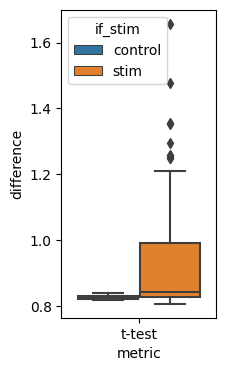

In [ ]:
from scipy import stats 
def average_dist_metric(x,y,fn):
    kl=0
    count_nan=0
    for i in range(x.shape[0]):

        sparse=np.absolute(fn(x[i],y[i]))
        if np.isnan(sparse):#nan: caused by division by 0-vector(vec of all 0)
            count_nan+=1   
        else:
            kl+=sparse
    if x.shape[0]==count_nan:
        return 0 # note that 0 for t-statistics  means that the result is inconclusive and more data may be needed to make a definitive conclusion.
    else:
        return kl/(x.shape[0]-count_nan)
    
def t_test(adata,ctrl,conditions,sample_ctrl=False,ctrl1=None,ctrl2=None):
    if sample_ctrl:
        x,y=ctrl1,ctrl2
    else:
        x,y=data_prep(adata,ctrl,conditions)
    x,y=dist_based(x,y)#only for distribution based methods
    fn=lambda x,y: stats.ttest_ind(x,y, equal_var=True)[0]
    return average_dist_metric(x,y,fn)

difference5,if_stim5,metric5=test(t_test,train,'t-test')
plt.figure(figsize=(2, 4))
df=pd.DataFrame({'difference':difference5, 'if_stim':if_stim5, 'metric':metric5})
sns.boxplot(data=df, x="metric", y="difference", hue="if_stim")

mean of computed statistics for (contrl, control): 0.00011152977
mean of computed statistics for (contrl, control): 0.000112799906
mean of computed statistics for (contrl, control): 0.00011308733
stim 0 mean of computed statistics: 0.00032701803
stim 1 mean of computed statistics: 0.0006602141
stim 2 mean of computed statistics: 0.00022508841
stim 3 mean of computed statistics: 0.00054410053
stim 4 mean of computed statistics: 0.0003135006
stim 5 mean of computed statistics: 0.00025367405
stim 6 mean of computed statistics: 0.00032058166
stim 7 mean of computed statistics: 0.00037670988
stim 8 mean of computed statistics: 0.00036503444
stim 9 mean of computed statistics: 0.0005664596
stim 10 mean of computed statistics: 0.0003833438
stim 11 mean of computed statistics: 0.00052622735
stim 12 mean of computed statistics: 0.00037732144
stim 13 mean of computed statistics: 0.00026948503
stim 14 mean of computed statistics: 0.00038150206
stim 15 mean of computed statistics: 0.0003199765
sti

<Axes: xlabel='metric', ylabel='difference'>

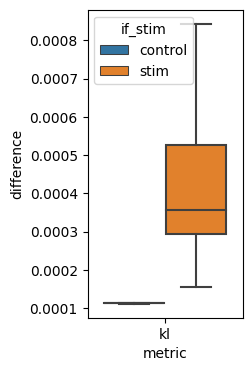

In [ ]:
from scipy.spatial import distance
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from scipy.special import rel_entr
#distribution based metrics 
#use Jensen-Shannon divergence to replace formula of kl divergence since kl diergence has
#inf result for sparse data 
# def average_dist_metric(x,y,fn):
#     kl=0
#     count_nan=0
#     for i in range(x.shape[0]):

#         sparse=fn(x[i],y[i])
#         if np.isnan(sparse):#nan: caused by division by 0-vector(vec of all 0)
#             count_nan+=1   
#         else:
#             kl+=sparse
#     if x.shape[0]==count_nan:
#         return 0 # note that 0 for t-statistics  means that the result is inconclusive and more data may be needed to make a definitive conclusion.
#     else:
#         return kl/(x.shape[0]-count_nan)

# def KL(a, b):
#     df=pd.DataFrame({'b':b})
#     df['b']=df['b'].replace(0,1e-100)
#     a = np.asarray(a, dtype=np.float)
#     b = np.asarray(df['b'], dtype=np.float)

#     return np.mean(rel_entr(a, b))

import torch.nn.functional as F
import torch.nn as nn
import torch

def kl(x,y):
    kl_loss=nn.KLDivLoss(reduction="batchmean")
    input_x=F.log_softmax(torch.from_numpy(x))
    # input_x.requires_grad=True
    target_y=F.softmax(torch.from_numpy(y))   
    return kl_loss(input_x, target_y).tolist()

def kl2(x,y):
  input=np.log(np.exp(x) / np.sum(np.exp(x)))
  target=np.exp(y)/np.sum(np.exp(y))
  loss= target*(np.log(target) - input)
  return loss
    
def calc_kl(adata,ctrl,conditions,sample_ctrl=False,ctrl1=None,ctrl2=None):
    if sample_ctrl:
        x,y=ctrl1,ctrl2
    else:
        x,y=data_prep(adata,ctrl,conditions)
    x,y=dist_based(x,y)#only for distribution based methods
    
    return compute_from_sample(x,y,kl2)

    # fn=lambda x,y: #KL(x,y)#sum(rel_entr(x, y))
    # return compute_from_sample(x,y,fn)

difference4,if_stim4,metric4=test(calc_kl,train,'kl')
plt.figure(figsize=(2, 4))
df=pd.DataFrame({'difference':difference4, 'if_stim':if_stim4, 'metric':metric4})
sns.boxplot(data=df, x="metric", y="difference", hue="if_stim")

In [ ]:
t=torch.tensor([0.111])
t.tolist()
t


tensor([0.1110])

In [ ]:
from scipy import stats
def calc_pearson(adata,ctrl,conditions, sample_ctrl=False,ctrl1=None,ctrl2=None):
    """
    param
    ---------
    adata
    condition: dictionary pass to adata to get sample1 and sample2 from specific 'condition'
    fn: function for computing pearson coefficient 
    -----------
    output: the average of pearson coefficient computed between each data from sample1 and sample2
    """
    fn=lambda x,y: stats.pearsonr(x,y).statistic
    
    if sample_ctrl:
        x,y=ctrl1,ctrl2
    else:
        x,y=data_prep(adata,ctrl,conditions)
      
    
    compute_from_mean(x,y,fn,sample_ctrl)
    
    
    pearson_obs=dict.fromkeys(range(x.shape[0]))
    for i in range(x.shape[0]):
        #use pd
        df = pd.DataFrame({'x':x[i], 'y':y[i]})
        matrix=df.corr(method='pearson').values
        pearson_obs[i] = matrix[0,1]
    
    pr=list(pearson_obs.values())
    
    return np.mean(pr)

difference0,if_stim0,metric0=test(calc_pearson,train,'pearson')


(795, 18649)
mean of computed statistics for (contrl, control): 0.5719105246940631
mean of computed statistics for (contrl, control): 0.5715821269020337
mean of computed statistics for (contrl, control): 0.572186431647521
(795, 18649) (266, 18649)
(795, 18649) (134, 18649)
(795, 18649) (99, 18649)
(795, 18649) (401, 18649)
(795, 18649) (165, 18649)
(795, 18649) (283, 18649)
(795, 18649) (75, 18649)
(795, 18649) (363, 18649)
(795, 18649) (285, 18649)
(795, 18649) (239, 18649)
(795, 18649) (248, 18649)
(795, 18649) (157, 18649)
(795, 18649) (233, 18649)
(795, 18649) (173, 18649)
(795, 18649) (240, 18649)
(795, 18649) (335, 18649)
(795, 18649) (235, 18649)
(795, 18649) (281, 18649)
(795, 18649) (140, 18649)
(795, 18649) (308, 18649)
(795, 18649) (142, 18649)
(795, 18649) (132, 18649)
(795, 18649) (145, 18649)
(795, 18649) (296, 18649)
(795, 18649) (250, 18649)
(795, 18649) (391, 18649)
(795, 18649) (97, 18649)
(795, 18649) (147, 18649)
(795, 18649) (359, 18649)
(795, 18649) (111, 18649)
(

<Axes: xlabel='metric', ylabel='difference'>

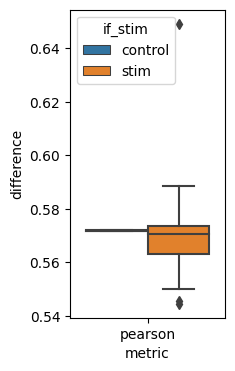

In [ ]:
import matplotlib.pyplot as plt
df=pd.DataFrame({'difference':difference0, 'if_stim':if_stim0, 'metric':metric0})
# print(difference,if_stim,metric)
plt.figure(figsize=(2, 4))
import seaborn as sns
sns.boxplot(data=df, x="metric", y="difference", hue="if_stim")

In [ ]:

from scipy import stats
def calc_mae(adata,ctrl,conditions,sample_ctrl=False,ctrl1=None,ctrl2=None):
    fn=lambda x,y: np.mean(np.abs(y-x)) 
    if sample_ctrl:
        x,y=ctrl1,ctrl2
    else:
        x,y=data_prep(adata,ctrl,conditions)

    # compute_from_mean(x,y,fn)
    return compute_from_sample(x,y,fn)

difference,if_stim,metric=test(calc_mae,train,'mae')

(795, 18649)
mean of computed statistics for (contrl, control): 0.11416543
mean of computed statistics for (contrl, control): 0.11301764
mean of computed statistics for (contrl, control): 0.11354292
(795, 18649) (266, 18649)
(795, 18649) (134, 18649)
(795, 18649) (99, 18649)
(795, 18649) (401, 18649)
(795, 18649) (165, 18649)
(795, 18649) (283, 18649)
(795, 18649) (75, 18649)
(795, 18649) (363, 18649)
(795, 18649) (285, 18649)
(795, 18649) (239, 18649)
(795, 18649) (248, 18649)
(795, 18649) (157, 18649)
(795, 18649) (233, 18649)
(795, 18649) (173, 18649)
(795, 18649) (240, 18649)
(795, 18649) (335, 18649)
(795, 18649) (235, 18649)
(795, 18649) (281, 18649)
(795, 18649) (140, 18649)
(795, 18649) (308, 18649)
(795, 18649) (142, 18649)
(795, 18649) (132, 18649)
(795, 18649) (145, 18649)
(795, 18649) (296, 18649)
(795, 18649) (250, 18649)
(795, 18649) (391, 18649)
(795, 18649) (97, 18649)
(795, 18649) (147, 18649)
(795, 18649) (359, 18649)
(795, 18649) (111, 18649)
(795, 18649) (238, 18649

<Axes: xlabel='metric', ylabel='difference'>

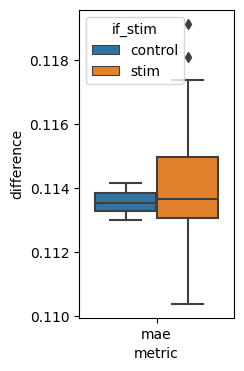

In [ ]:
# print(difference2,if_stim2,metric2)
plt.figure(figsize=(2, 4))
df=pd.DataFrame({'difference':difference, 'if_stim':if_stim, 'metric':metric})
sns.boxplot(data=df, x="metric", y="difference", hue="if_stim")

(795, 18649)
mean of computed statistics for (contrl, control): 33.894222
mean of computed statistics for (contrl, control): 34.10766
mean of computed statistics for (contrl, control): 34.225346
(795, 18649) (266, 18649)
(795, 18649) (266, 18649)
(795, 18649) (266, 18649)
(795, 18649) (134, 18649)
(795, 18649) (134, 18649)
(795, 18649) (134, 18649)
(795, 18649) (99, 18649)
(795, 18649) (99, 18649)
(795, 18649) (99, 18649)
(795, 18649) (401, 18649)
(795, 18649) (401, 18649)
(795, 18649) (401, 18649)
(795, 18649) (165, 18649)
(795, 18649) (165, 18649)
(795, 18649) (165, 18649)
(795, 18649) (283, 18649)
(795, 18649) (283, 18649)
(795, 18649) (283, 18649)
(795, 18649) (75, 18649)
(795, 18649) (75, 18649)
(795, 18649) (75, 18649)
(795, 18649) (363, 18649)
(795, 18649) (363, 18649)
(795, 18649) (363, 18649)
(795, 18649) (285, 18649)
(795, 18649) (285, 18649)
(795, 18649) (285, 18649)
(795, 18649) (239, 18649)
(795, 18649) (239, 18649)
(795, 18649) (239, 18649)
(795, 18649) (248, 18649)
(795,

<Axes: xlabel='metric', ylabel='difference'>

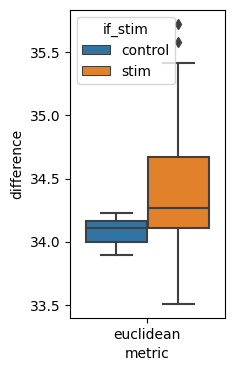

In [ ]:
def calc_euclidean_d(adata,ctrl,conditions,sample_ctrl=False,ctrl1=None,ctrl2=None):
    fn=lambda x,y: np.linalg.norm(x-y)
    if sample_ctrl:
        x,y=ctrl1,ctrl2
    else:
        x,y=data_prep(adata,ctrl,conditions)
    compute_from_mean(x,y,fn) 
    return compute_from_sample(x,y,fn)

difference2,if_stim2,metric2=test(calc_euclidean_d,train,'euclidean')
plt.figure(figsize=(2, 4))
df=pd.DataFrame({'difference':difference2, 'if_stim':if_stim2, 'metric':metric2})
sns.boxplot(data=df, x="metric", y="difference", hue="if_stim")


In [ ]:
# train1=sc.pp.normalize_total(train, target_sum=1e4)['X']

# X_norm = sc.pp.normalize_total(train, target_sum=1, inplace=False)['X']
# sc.pp.log1p(train)
# print(train.X.toarray())
# print(X_norm.toarray())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(795, 18649)
mean of computed statistics for (contrl, control): 0.32823181128517975
mean of computed statistics for (contrl, control): 0.3341470427266544
mean of computed statistics for (contrl, control): 0.33264280371884025
(795, 18649) (266, 18649)
(795, 18649) (266, 18649)
(795, 18649) (266, 18649)
(795, 18649) (134, 18649)
(795, 18649) (134, 18649)
(795, 18649) (134, 18649)
(795, 18649) (99, 18649)
(795, 18649) (99, 18649)
(795, 18649) (99, 18649)
(795, 18649) (401, 18649)
(795, 18649) (401, 18649)
(795, 18649) (401, 18649)
(795, 18649) (165, 18649)
(795, 18649) (165, 18649)
(795, 18649) (165, 18649)
(795, 18649) (283, 18649)
(795, 18649) (283, 18649)
(795, 18649) (283, 18649)
(795, 18649) (75, 18649)
(795, 18649) (75, 18649)
(795, 18649) (75, 18649)
(795, 18649) (363, 18649)
(795, 18649) (363, 18649)
(795, 18649) (363, 18649)
(795, 18649) (285, 18649)
(795, 18649) (285, 18649)
(795, 18649) (285, 18649)
(795, 18649) (239, 18649)
(795, 18649) (239, 18649)
(795, 18649) (239, 18649)
(

<Axes: xlabel='metric', ylabel='difference'>

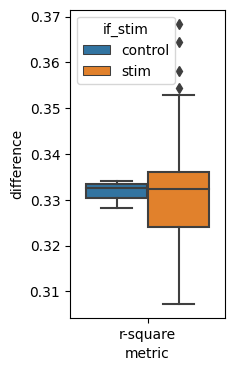

In [ ]:
def calc_r(adata,ctrl,conditions,sample_ctrl=False,ctrl1=None,ctrl2=None):
    fn=lambda x,y: stats.linregress(x,y)[2]**2
    if sample_ctrl:
        x,y=ctrl1,ctrl2
    else:
        x,y=data_prep(adata,ctrl,conditions)
    compute_from_mean(x,y,fn)
    return compute_from_sample(x,y,fn)

difference3,if_stim3,metric3=test(calc_r,train,'r-square')
plt.figure(figsize=(2, 4))
df=pd.DataFrame({'difference':difference3, 'if_stim':if_stim3, 'metric':metric3})
sns.boxplot(data=df, x="metric", y="difference", hue="if_stim")

(795, 18649)
mmd
mean of computed statistics for (contrl, control): 0.00012470781803131104
mmd
mmd
mean of computed statistics for (contrl, control): 0.00012224912643432617
mmd
mmd
mean of computed statistics for (contrl, control): 0.00012715160846710205
mmd
(795, 18649) (266, 18649)
mmd
(795, 18649) (266, 18649)
mmd
(795, 18649) (266, 18649)
mmd
(795, 18649) (134, 18649)
mmd
(795, 18649) (134, 18649)
mmd
(795, 18649) (134, 18649)
mmd
(795, 18649) (99, 18649)
mmd
(795, 18649) (99, 18649)
mmd
(795, 18649) (99, 18649)
mmd
(795, 18649) (401, 18649)
mmd
(795, 18649) (401, 18649)
mmd
(795, 18649) (401, 18649)
mmd
(795, 18649) (165, 18649)
mmd
(795, 18649) (165, 18649)
mmd
(795, 18649) (165, 18649)
mmd
(795, 18649) (283, 18649)
mmd
(795, 18649) (283, 18649)
mmd
(795, 18649) (283, 18649)
mmd
(795, 18649) (75, 18649)
mmd
(795, 18649) (75, 18649)
mmd
(795, 18649) (75, 18649)
mmd
(795, 18649) (363, 18649)
mmd
(795, 18649) (363, 18649)
mmd
(795, 18649) (363, 18649)
mmd
(795, 18649) (285, 18649)
m

<Axes: xlabel='metric', ylabel='difference'>

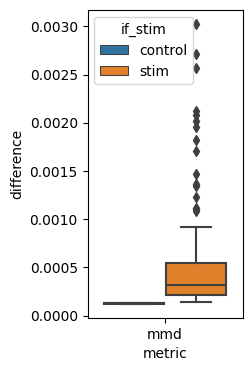

In [ ]:
from sklearn import metrics
#very slow ~20min
def mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    
    print("mmd")
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()

def mmd(adata,ctrl,conditions,sample_ctrl=False,ctrl1=None,ctrl2=None):
    if sample_ctrl:
        x,y=ctrl1,ctrl2
    else:
        x,y=data_prep(adata,ctrl,conditions)
    x,y=dist_based(x,y)
    # print(mmd_rbf(x,y))

    return mmd_rbf(x,y)

difference6,if_stim6,metric6=test(mmd,train,'mmd')
plt.figure(figsize=(2, 4))
df=pd.DataFrame({'difference':difference6, 'if_stim':if_stim6, 'metric':metric6})
sns.boxplot(data=df, x="metric", y="difference", hue="if_stim")

(795, 18649)
mean of computed statistics for (contrl, control): 0.0069115028815787075
mean of computed statistics for (contrl, control): 0.0067556904579926455
mean of computed statistics for (contrl, control): 0.006948949435346259
(795, 18649) (266, 18649)
(795, 18649) (266, 18649)
(795, 18649) (266, 18649)
(795, 18649) (134, 18649)
(795, 18649) (134, 18649)
(795, 18649) (134, 18649)
(795, 18649) (99, 18649)
(795, 18649) (99, 18649)
(795, 18649) (99, 18649)
(795, 18649) (401, 18649)
(795, 18649) (401, 18649)
(795, 18649) (401, 18649)
(795, 18649) (165, 18649)
(795, 18649) (165, 18649)
(795, 18649) (165, 18649)
(795, 18649) (283, 18649)
(795, 18649) (283, 18649)
(795, 18649) (283, 18649)
(795, 18649) (75, 18649)
(795, 18649) (75, 18649)
(795, 18649) (75, 18649)
(795, 18649) (363, 18649)
(795, 18649) (363, 18649)
(795, 18649) (363, 18649)
(795, 18649) (285, 18649)
(795, 18649) (285, 18649)
(795, 18649) (285, 18649)
(795, 18649) (239, 18649)
(795, 18649) (239, 18649)
(795, 18649) (239, 18

<Axes: xlabel='metric', ylabel='difference'>

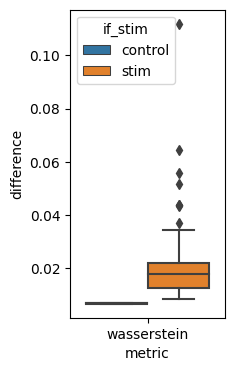

In [ ]:
def calc_wasserstein(adata,ctrl,conditions,sample_ctrl=False,ctrl1=None,ctrl2=None):
    fn=lambda x,y: stats.wasserstein_distance(x,y)
    if sample_ctrl:
        x,y=ctrl1,ctrl2
    else:
        x,y=data_prep(adata,ctrl,conditions)
    x,y=dist_based(x,y)
    return compute_from_sample(x,y,fn)


difference7,if_stim7,metric7=test(calc_wasserstein,train,'wasserstein')
plt.figure(figsize=(2, 4))
df=pd.DataFrame({'difference':difference7, 'if_stim':if_stim7, 'metric':metric7})
sns.boxplot(data=df, x="metric", y="difference", hue="if_stim")